In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import scipy
import math

## 문제 1: 데이터셋 불러오기 및 기본 정보 확인

In [106]:
# 데이터셋 불러온 후 첫 5개행 출력
irisDF = pd.read_csv('./data/iris.csv')
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [107]:
# 데이터프레임 기본정보 확인
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


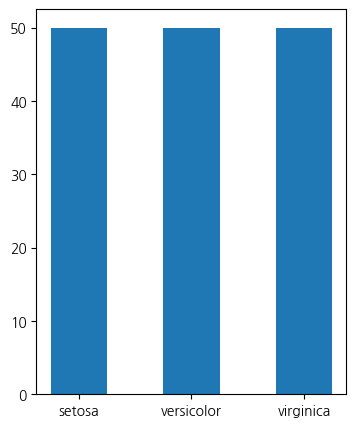


setosa total : 50
versicolor total : 50
virginica total : 50


In [109]:
# 클래스 분포 확인
# 품종별 데이터 수를 담기 위한 딕셔너리
total_dict = {}

# 품종별로 딕셔너리에 데이터수 담기
for specie in irisDF['species'].unique():
    specieDF = irisDF[irisDF['species'] == specie]
    total_dict[specie] = specieDF.shape[0]

plt.figure(figsize=(4,5))
plt.bar(total_dict.keys(), total_dict.values(), width=0.5)
plt.show()
print()

for k, v in total_dict.items():
    print(f'{k} total : {v}')

## 문제 2: 데이터 시각화 및 탐색

In [110]:
# 각 특성을 2개씩 짝지은 리스트 만들기
features = irisDF.columns[:-1]
pair_features = []
idx = 0
next = 1

while idx < len(features):
    if idx+next >= len(features):
        idx += 1
        next = 1
    else:
        pair_features.append([features[idx], features[idx+next]])
        next += 1

pair_features

[['sepal_length', 'sepal_width'],
 ['sepal_length', 'petal_length'],
 ['sepal_length', 'petal_width'],
 ['sepal_width', 'petal_length'],
 ['sepal_width', 'petal_width'],
 ['petal_length', 'petal_width']]

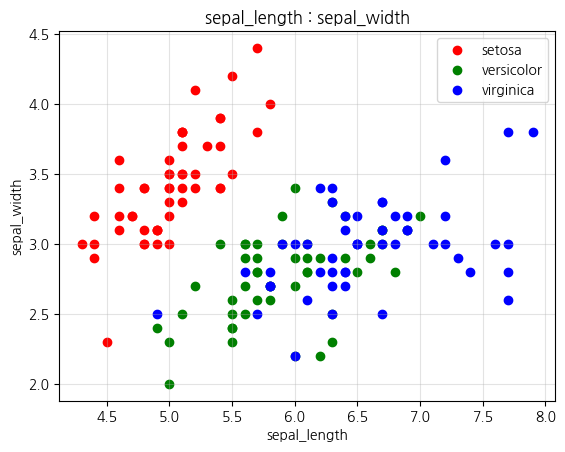

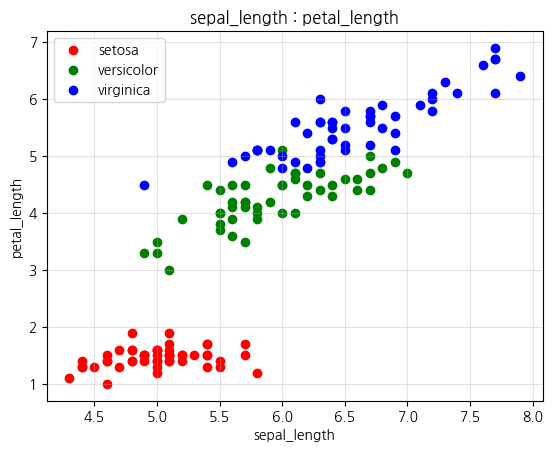

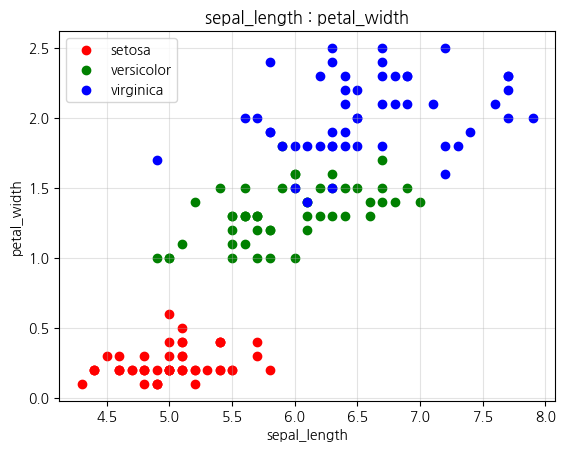

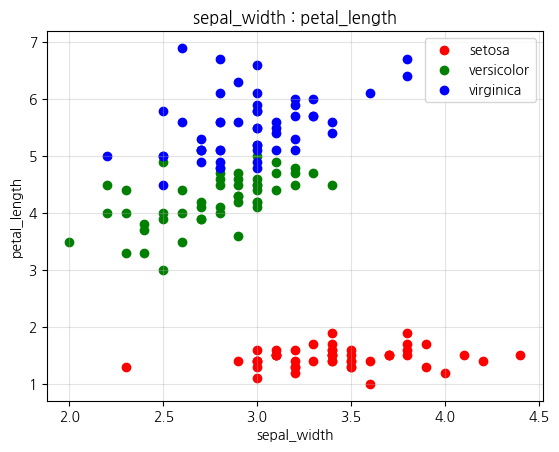

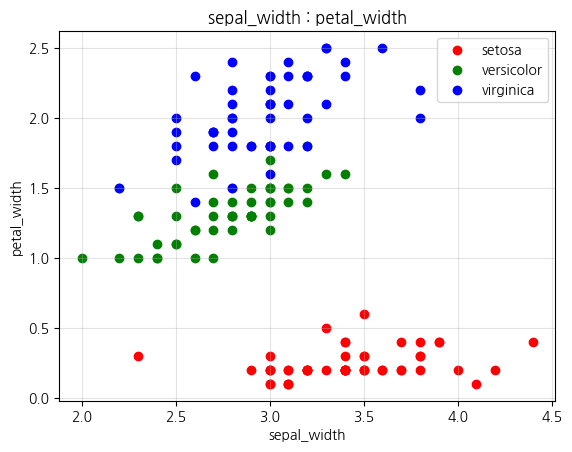

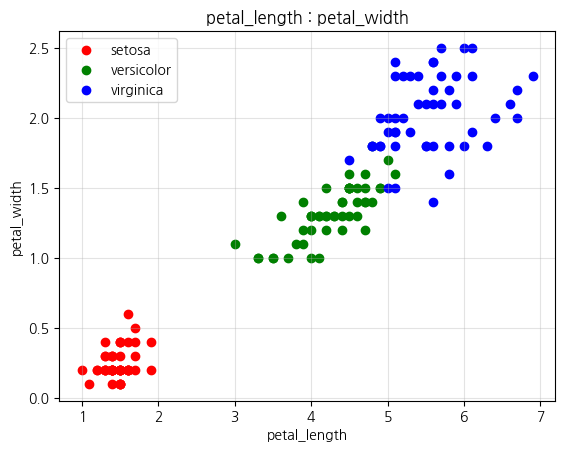

In [112]:
# 산점도 그래프 그리기
colorList = ['r', 'g', 'b']

for pf in pair_features:
    feat1, feat2 = pf
    c_idx = 0
    for specie in irisDF['species'].unique():
        specieDF = irisDF[irisDF['species'] == specie]
        plt.grid(alpha=0.35)
        plt.scatter(specieDF[feat1], specieDF[feat2], color=colorList[c_idx])
        
        c_idx += 1

    plt.title(f'{feat1} : {feat2}')
    plt.xlabel(f'{feat1}')
    plt.ylabel(f'{feat2}')
    plt.legend(irisDF['species'].unique())
    plt.show()

    

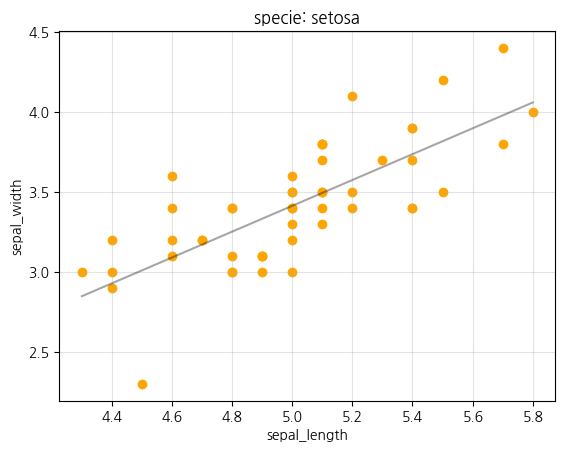

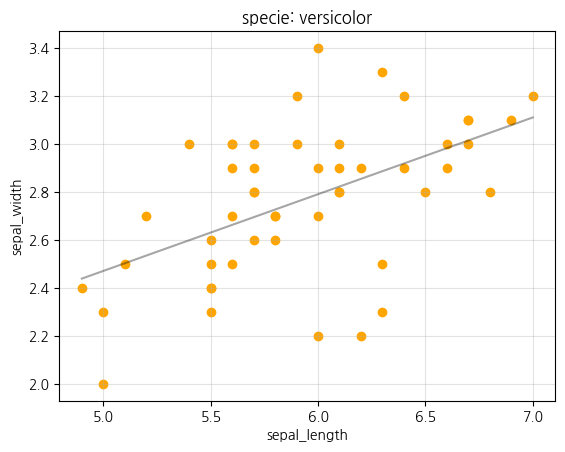

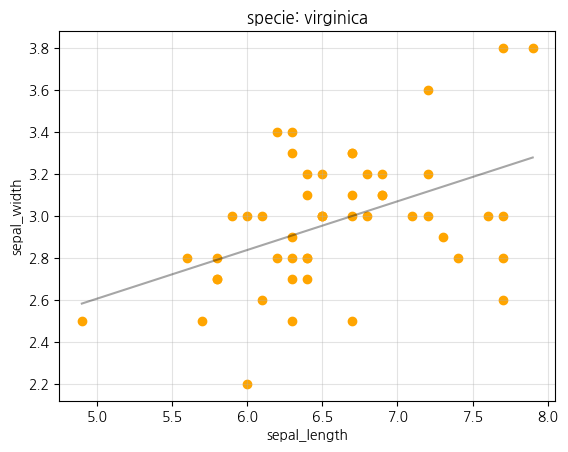

In [113]:
# sepal length와 sepal width 관계 비교
for specie in irisDF['species'].unique():
    specieDF = irisDF[irisDF['species'] == specie]

    plt.scatter(specieDF['sepal_length'], specieDF['sepal_width'], color='orange')
    plt.title(f'specie: {specie}')
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')

    poly_fit = np.polyfit(specieDF['sepal_length'], specieDF['sepal_width'], 1)
    poly_1d = np.poly1d(poly_fit)
    xs = np.linspace(specieDF['sepal_length'].min(), specieDF['sepal_length'].max())
    ys = poly_1d(xs)

    plt.plot(xs, ys, color='black', alpha=0.35)
    plt.grid(alpha=0.35)
    
    plt.show()

## 문제 3: 연속확률변수 및 연속확률분포 계산
- 풀이중

In [41]:
irisDF['petal_length'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [43]:
irisDF['petal_length'].min(), irisDF['petal_length'].max()

(1.0, 6.9)

In [49]:
border_list = [ float(i) for i in range(1, 7)]
border_list

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [52]:
category_list = [ f'[{f}, {f+1.0})' for f in border_list]
category_list

['[1.0, 2.0)',
 '[2.0, 3.0)',
 '[3.0, 4.0)',
 '[4.0, 5.0)',
 '[5.0, 6.0)',
 '[6.0, 7.0)']

In [85]:
category_dict = {}

for category in category_list:
    low, high = map(float, category[1:-1].split(', '))

    category_dict[category] = irisDF[(irisDF['petal_length'] >= low) & 
                                    (irisDF['petal_length'] < high)]['petal_length']

# category_dict

{'[1.0, 2.0)': 0     1.4
 1     1.4
 2     1.3
 3     1.5
 4     1.4
 5     1.7
 6     1.4
 7     1.5
 8     1.4
 9     1.5
 10    1.5
 11    1.6
 12    1.4
 13    1.1
 14    1.2
 15    1.5
 16    1.3
 17    1.4
 18    1.7
 19    1.5
 20    1.7
 21    1.5
 22    1.0
 23    1.7
 24    1.9
 25    1.6
 26    1.6
 27    1.5
 28    1.4
 29    1.6
 30    1.6
 31    1.5
 32    1.5
 33    1.4
 34    1.5
 35    1.2
 36    1.3
 37    1.5
 38    1.3
 39    1.5
 40    1.3
 41    1.3
 42    1.3
 43    1.6
 44    1.9
 45    1.4
 46    1.6
 47    1.4
 48    1.5
 49    1.4
 Name: petal_length, dtype: float64,
 '[2.0, 3.0)': Series([], Name: petal_length, dtype: float64),
 '[3.0, 4.0)': 57    3.3
 59    3.9
 60    3.5
 64    3.6
 69    3.9
 79    3.5
 80    3.8
 81    3.7
 82    3.9
 93    3.3
 98    3.0
 Name: petal_length, dtype: float64,
 '[4.0, 5.0)': 50     4.7
 51     4.5
 52     4.9
 53     4.0
 54     4.6
 55     4.5
 56     4.7
 58     4.6
 61     4.2
 62     4.0
 63     4.7
 65     4.4
 66   

In [86]:
irisDF['petal_length'].sum()

563.8

In [87]:
normF=scipy.stats.norm.pdf(irisDF['petal_length'].sort_values(),
                         irisDF['petal_length'].mean(),
                         irisDF['petal_length'].std())

(array([ 4.,  6., 36., 18., 11.,  5., 12., 13., 17., 28.]),
 array([0.04634547, 0.06431511, 0.08228474, 0.10025438, 0.11822402,
        0.13619365, 0.15416329, 0.17213293, 0.19010256, 0.2080722 ,
        0.22604184]),
 <BarContainer object of 10 artists>)

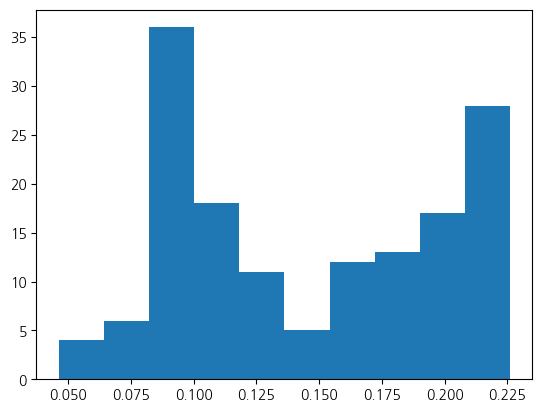

In [88]:
plt.hist(normF)

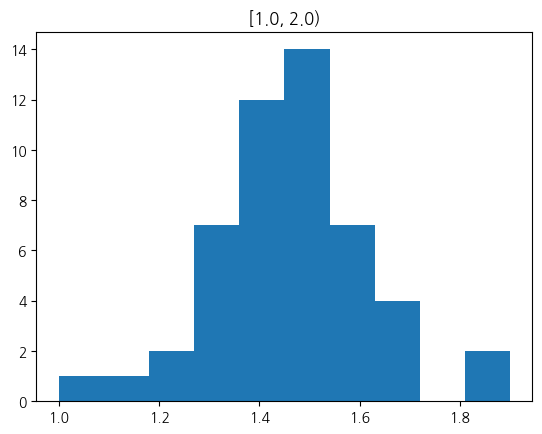

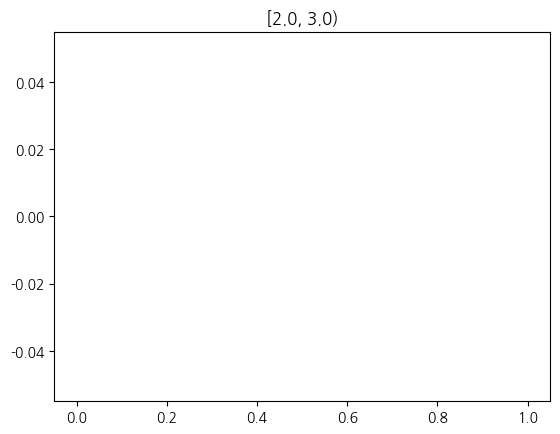

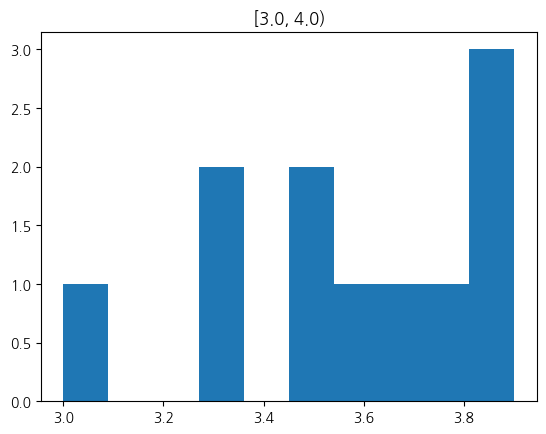

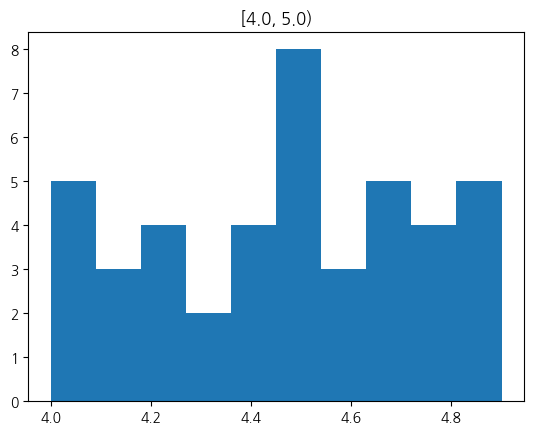

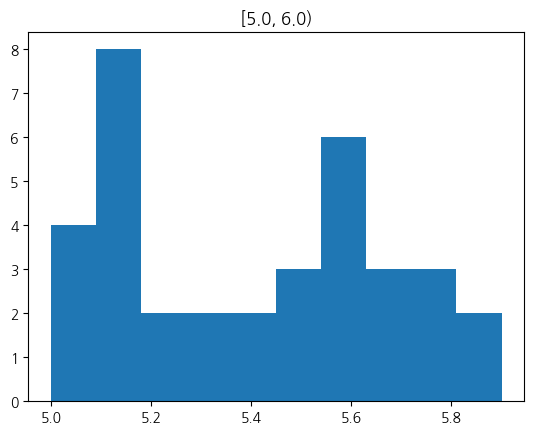

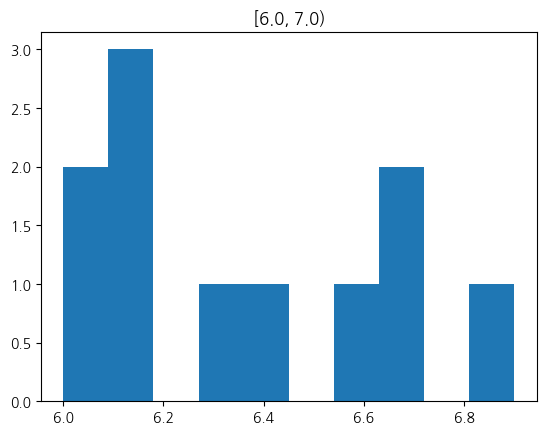

In [89]:
for k, v in category_dict.items():
    plt.hist(v)
    plt.title(k)
    plt.show()

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

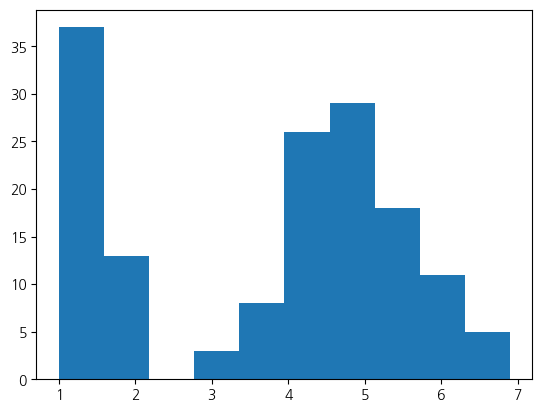

In [90]:
plt.hist(irisDF['petal_length'])

(array([[ 3.,  4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  8., 18., 17.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 16., 14.,  5.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  2.,  4.]]),
 array([3.  , 3.39, 3.78, 4.17, 4.56, 4.95, 5.34, 5.73, 6.12, 6.51, 6.9 ]),
 <a list of 4 BarContainer objects>)

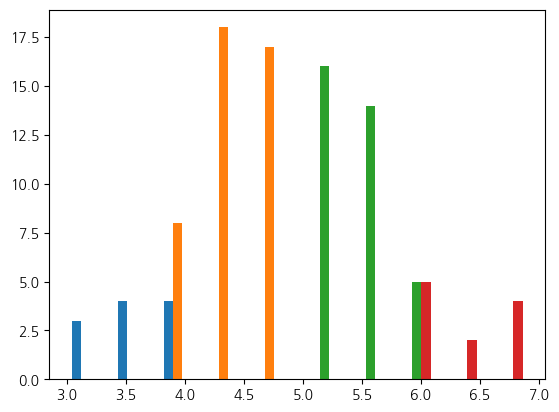

In [91]:
plt.hist(list(category_dict.values())[2:])

In [84]:
category_dict.values()

dict_values([array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4]), array([], dtype=float64), array([3.3, 3.9, 3.5, 3.6, 3.9, 3.5, 3.8, 3.7, 3.9, 3.3, 3. ]), array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 4.6, 4.2, 4. , 4.7, 4.4, 4.5,
       4.1, 4.5, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 4.5, 4.5, 4.5, 4.7,
       4.4, 4.1, 4. , 4.4, 4.6, 4. , 4.2, 4.2, 4.2, 4.3, 4.1, 4.5, 4.9,
       4.9, 4.8, 4.9, 4.8]), array([5. , 5.1, 5.1, 5.9, 5.6, 5.8, 5.8, 5.1, 5.3, 5.5, 5. , 5.1, 5.3,
       5.5, 5. , 5.7, 5.7, 5.6, 5.8, 5.6, 5.1, 5.6, 5.6, 5.5, 5.4, 5.6,
       5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1]), array([6. , 6.6, 6.3, 6.1, 6.7, 6.9, 6.7, 6. , 6.1, 6.4, 6.1])])

In [97]:
category_dict['[1.0, 2.0)'].mean(), category_dict['[1.0, 2.0)'].std()

(1.464, 0.1735111594364455)

In [98]:
list(category_dict.keys())[2:]

['[3.0, 4.0)', '[4.0, 5.0)', '[5.0, 6.0)', '[6.0, 7.0)']

In [101]:
over3 =  irisDF[(irisDF['petal_length'] >= 3.0) & 
                                    (irisDF['petal_length'] < 7.0)]['petal_length']
over3

50     4.7
51     4.5
52     4.9
53     4.0
54     4.6
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 100, dtype: float64

In [102]:
over3.mean(), over3.std()

(4.906, 0.8255784626428904)

In [104]:
# 정규분포식 : 1/(2*math.pi*std**2)**(1/2) * math.exp((x-mean)**2/(-2std**2))

In [105]:
# 혼합정규분포 처리 방식을 익히고 다시 시도 예정